# PML Test (Hugonin 2005)

This test illustrates the usage of the complex coordinate transform. This is useful when dealing with structure in which a high portion of the power is scattered away. 

This test is based on the paper **"Perfectly matched layers as nonlinear coordinate
transforms: a generalized formalization" by Jean Paul Hugonin and Philippe Lalanne (J. Opt. Soc. Am. A / Vol. 22, No. 9 / September 2005).** [10.1364/JOSAA.22.001844](https://doi.org/10.1364/JOSAA.22.001844)

## Summary
The example will compute the reflection and transmission from 2 dent in a 1D waveguide. 

The following example will:
 1. Import all necessary modules
 2. Define the layers involved
 3. Combine them into a structure
 4. Calculate transmission and reflection
 5. Sweep over truncation order
 
 
### Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import A_FMM

### Define layers involved

In [2]:
ax = 1.1
lam = 0.975
k0 = ax/lam

s = 0.3
d = 0.15

n_core = 3.5
n_clad = 2.9
n_air = 1.0

Nx = 20
Ny = 0

cr = A_FMM.Creator()
cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
wave = A_FMM.Layer(Nx,0,cr)
wave.transform(0.3/1.1, complex_transform=True)
cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
gap=A_FMM.Layer(Nx,0,cr)   
gap.transform(0.3/1.1, complex_transform=True)

(array([[ 5.90909091e-01-4.54545455e-02j,  2.72660178e-01+1.73262321e-02j,
         -4.96979855e-02+2.09010219e-02j, ...,
         -7.50191184e-06-2.50721126e-06j, -6.93858730e-06-2.31863380e-06j,
         -1.99160242e-06-6.65441959e-07j],
        [ 2.72660178e-01+1.73262321e-02j,  5.90909091e-01-4.54545455e-02j,
          2.72660178e-01+1.73262321e-02j, ...,
         -2.51739592e-06-8.41459341e-07j, -7.50191184e-06-2.50721126e-06j,
         -6.93858730e-06-2.31863380e-06j],
        [-4.96979855e-02+2.09010219e-02j,  2.72660178e-01+1.73262321e-02j,
          5.90909091e-01-4.54545455e-02j, ...,
          5.24552476e-06+1.75363218e-06j, -2.51739592e-06-8.41459341e-07j,
         -7.50191184e-06-2.50721126e-06j],
        ...,
        [-7.50191184e-06-2.50721126e-06j, -2.51739592e-06-8.41459341e-07j,
          5.24552476e-06+1.75363218e-06j, ...,
          5.90909091e-01-4.54545455e-02j,  2.72660178e-01+1.73262321e-02j,
         -4.96979855e-02+2.09010219e-02j],
        [-6.93858730e-06-2.

/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/matplotlib/contour.py:1568: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/matplotlib/contour.py:1569: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/home/marco/Documents/MyPrograms/A_FMM/test_venv/lib/python3.10/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None)

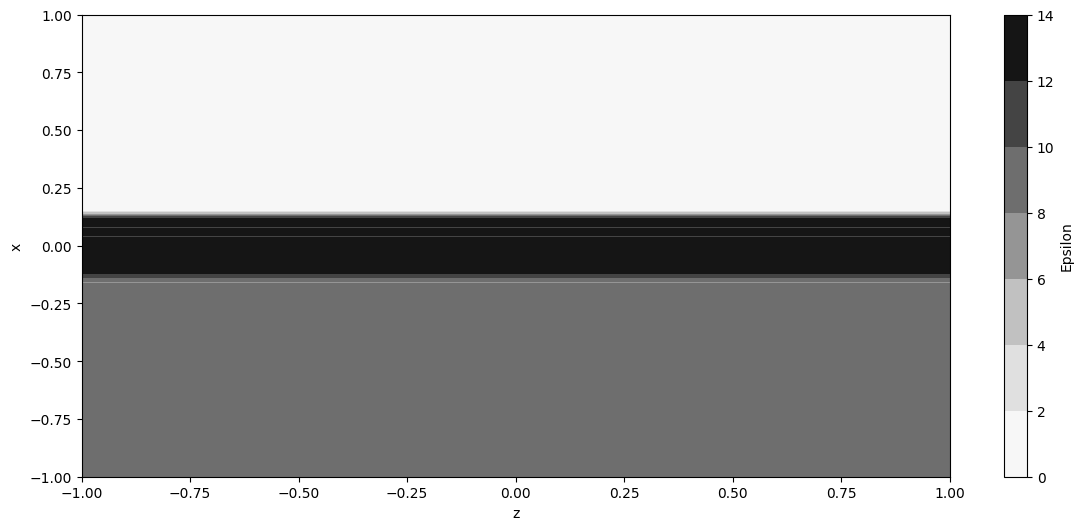

In [3]:
x = np.linspace(-1.0, 1.0, 101)
z = np.linspace(-1.0, 1.0, 101)

eps = wave.calculate_epsilon(x=x, z=z)
fig, axp = plt.subplots(1,1, figsize=(14, 6))
_ = axp.contourf(np.squeeze(z), x, np.squeeze(eps['eps']), cmap='Greys')
plt.xlabel('z'), plt.ylabel('x'), fig.colorbar(_, ax=axp).set_label('Epsilon')

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None)

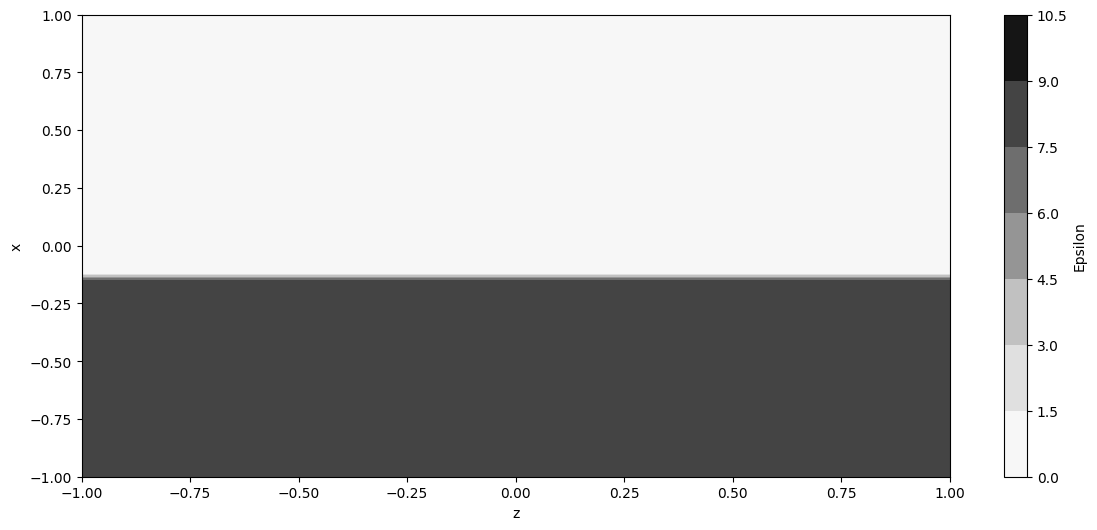

In [4]:
eps = gap.calculate_epsilon(x=x, z=z)
fig, axp = plt.subplots(1,1, figsize=(14, 6))
_ = axp.contourf(z, x, np.squeeze(eps['eps']), cmap='Greys')
plt.xlabel('z'), plt.ylabel('x'), fig.colorbar(_, ax=axp).set_label('Epsilon')

### Define stack structure

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None, Text(0.5, 1.0, 'Epsilon'))

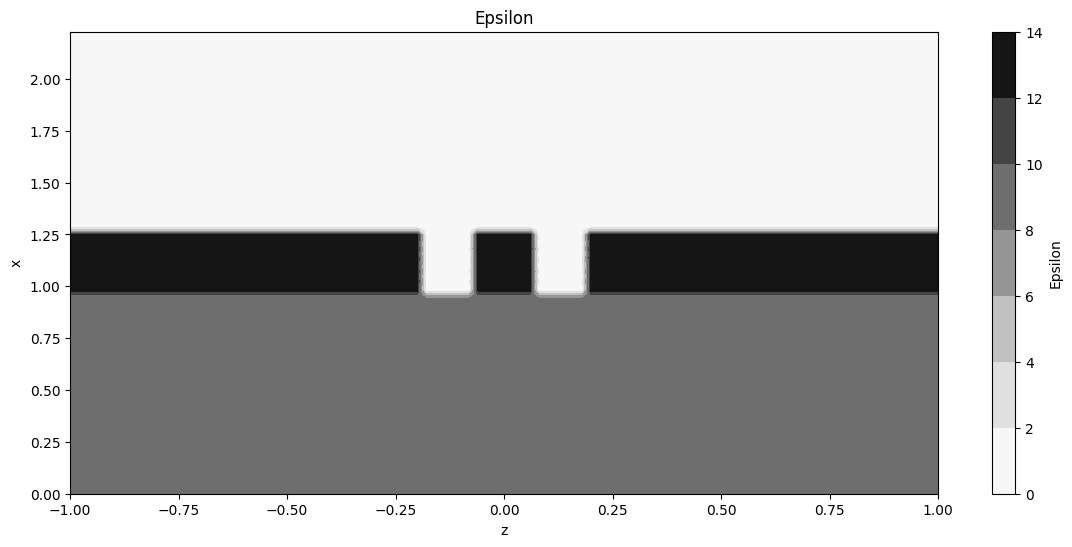

In [5]:
mat = [wave, gap, wave, gap, wave]
dl = [_/ax for _ in [1.0,d,d,d,1.0]]
st = A_FMM.Stack(mat, dl)
st.count_interface()
st.transform(0.3/1.1, complex_transform=True)

x = np.linspace(-1.0, 1.0, 101)
z = np.linspace(0.0, st.total_length, 101)

fig, axp = plt.subplots(1,1, figsize=(14,6))
eps = st.calculate_epsilon(x=x, z=z)
_ = axp.contourf(x, z, np.squeeze(eps['eps']), cmap='Greys')
axp.set_xlabel('z'), axp.set_ylabel('x'),  fig.colorbar(_, ax=axp).set_label('Epsilon'), axp.set_title('Epsilon')

### Solve structure and calculate reflection


In [6]:
st.solve(ax/lam)
print('TE Reflection:{}'.format(st.get_R(0,0)))
print('TM Reflection:{}'.format(st.get_R(1,1)))

TE Reflection:0.39516541327755816
TM Reflection:0.3562340123876459


## Field Plotting
### Plotting field under TE illumination

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None, Text(0.5, 1.0, 'Field'))

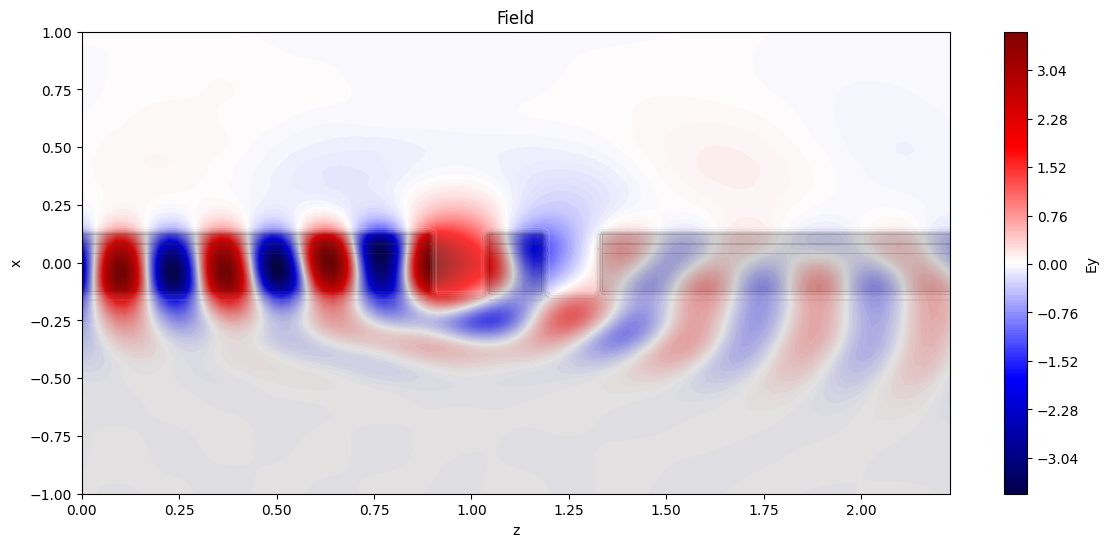

In [7]:
u = wave.create_input({0 : 1.0})
field = st.calculate_fields(u1=u, x=x, z=z)
fig, axp = plt.subplots(1,1, figsize=(14,6))
_ = axp.contourf(z, x, np.squeeze(field['Ey']), cmap='seismic', levels=201)
axp.contourf(z, x, np.squeeze(eps['eps']), cmap='Greys', alpha=0.2)
axp.set_xlabel('z'), axp.set_ylabel('x'),  fig.colorbar(_, ax=axp).set_label('Ey'), axp.set_title('Field')

(Text(0.5, 0, 'z'), Text(0, 0.5, 'x'), None, Text(0.5, 1.0, 'Field'))

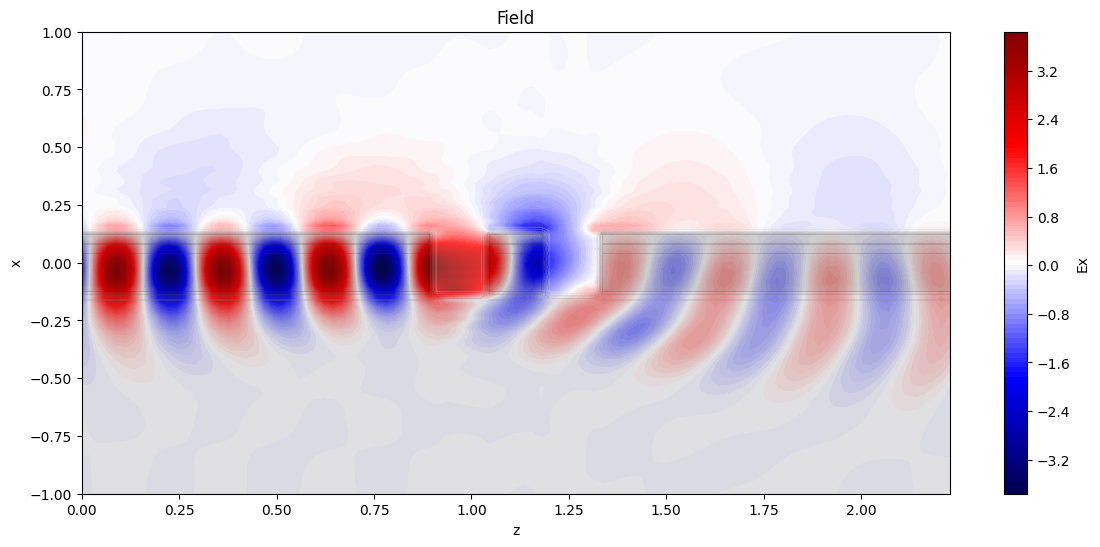

In [8]:
u = wave.create_input({1 : 1.0})
field = st.calculate_fields(u1=u, x=x, z=z)
fig, axp = plt.subplots(1,1, figsize=(14,6))
_ = axp.contourf(z, x, np.squeeze(field['Ex']), cmap='seismic', levels=101)
axp.contourf(z, x, np.squeeze(eps['eps']), cmap='Greys', alpha=0.2)
axp.set_xlabel('z'), axp.set_ylabel('x'),  fig.colorbar(_, ax=axp).set_label('Ex'), axp.set_title('Field')

## Sweep over truncation order

In [9]:
def calc(Nx):
    cr.slab(n_core**2.0, n_clad**2.0, n_air**2.0, s/ax)
    wave = A_FMM.Layer(Nx,0,cr)
    cr.slab(n_air**2.0, n_clad**2.0, n_air**2.0, s/ax)
    gap=A_FMM.Layer(Nx,0,cr)   
    mat = [wave, gap, wave, gap, wave]
    dl = [x/ax for x in [1.0,d,d,d,1.0]]
    st = A_FMM.Stack(mat, dl)
    st.count_interface()
    st.transform(0.7, complex_transform=True)
    st.solve(ax/lam)
    return st.get_R(0,0), st.get_R(1,1)

In [10]:
NX = [10,20,30,40,50,60,70,80,100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240]
RR = [calc(Nx) for Nx in NX]
Data = pd.DataFrame(RR, index=NX, columns=['TE', 'TM'])

(None,
 None,
 Text(0.5, 0, 'Truncation Order'),
 Text(0, 0.5, '$|R-R_0|$'),
 None)

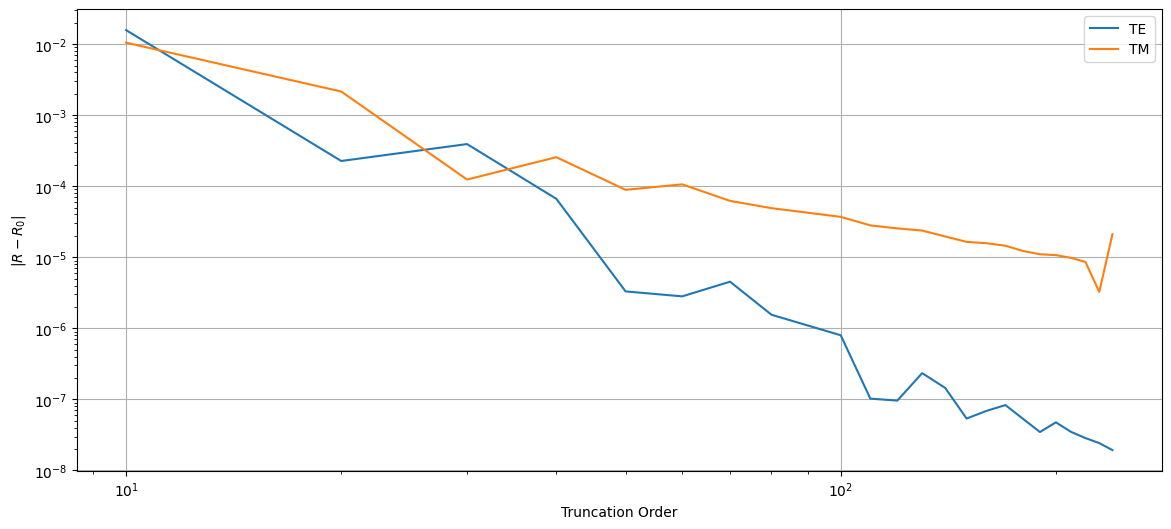

In [11]:
fig, axp = plt.subplots(1,1, figsize=(14, 6))
plt.plot(NX, abs(Data['TE']-0.3952113445) , label='TE')
plt.plot(NX, abs(Data['TM']-0.3554787) , label='TM')
plt.yscale('log'), plt.xscale('log'), plt.xlabel('Truncation Order'), plt.ylabel(r'$|R-R_0|$'), plt.legend(), plt.grid()